## Introduction
### Context
<p> Unemployment is considered to be a key measure of the health of the economy. Since it is a key 
macroeconomic variable and is crucial for economic planning, there is a need to provide accurate 
predictions. The most frequent measure of unemployment is the unemployment rate, which is the 
number of unemployed people divided by the number of people in the labor force. </p>

## Importing Librairies

In [115]:
import numpy as np # Numpy helps us to do complex and high-level mathematical functions on large,
                    # multi-dimentional array and matrices
    
import pandas as pd # Pandas offers us data structures and operations for manipulating numerical 
                    #tables and time series
    
import matplotlib.pyplot as plt # Matplotlib helps us to embed plots into applications, commonly used
                                # for data visualisation
from pandas import read_excel
import sys
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative 
                      # statistical graphics.
sns.set_theme(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid'

import plotly.express as px # Plotly is yet another data visualisation and interactive open-source library.
                            # Plotly graph objects are a high-level interface to plotly which are easy to use
    
import seaborn as sb
    
from chart_studio import plotly

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose # For seasonality decomposition in Model Building
from statsmodels.tsa.arima_model import ARIMA # model used for linear reression
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

## Reading and making a very basic understanding of the dataset

In [116]:
df = pd.read_excel('Data.xlsx') # Reads the .excel file and converts to pandas Dataframe Object

In [117]:
df.head(10) # Shows top rows of the dataset (value - 10)

,Subject,Unnamed: 1,"Unemployment rate (monthly), Total, All persons",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 761,Unnamed: 762,Unnamed: 763,Unnamed: 764,Unnamed: 765,Unnamed: 766,Unnamed: 767,Unnamed: 768,Unnamed: 769,Unnamed: 770
0,Measure,NaN,"Level, rate or quantity series, s.a.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unit,NaN,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frequency,NaN,Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Time,NaN,NaN,Jan-1990,NaN,Feb-1990,NaN,Mar-1990,NaN,Apr-1990,...,Aug-2021,NaN,Sep-2021,NaN,Oct-2021,NaN,Nov-2021,NaN,Dec-2021,NaN
4,Country,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Netherlands,i,NaN,NaN,6.3,NaN,6.3,NaN,6.2,NaN,...,NaN,4.2,NaN,4.1,NaN,3.9,NaN,3.7,NaN,3.8


In [118]:
df.info() # Gathering more knowledge about the data like number of rows and columns, datatype and not-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 771 entries, Subject to Unnamed: 770
dtypes: float64(384), object(387)
memory usage: 36.3+ KB


In [119]:
df.shape # shape of the dataframe object

(6, 771)

In [120]:
df.isna().sum().sort_values(ascending = False) # Check if there any NA values in the DataFrame

Unnamed: 385                                       5
Unnamed: 578                                       5
Unnamed: 508                                       5
Unnamed: 509                                       5
Unnamed: 510                                       5
                                                  ..
Unnamed: 263                                       5
Unnamed: 4                                         5
Unnamed: 1                                         4
Unemployment rate (monthly), Total, All persons    3
Subject                                            0
Length: 771, dtype: int64

In [121]:
df.isnull().sum().sort_values(ascending = False) # check if is there any null values in the DataFrame

Unnamed: 385                                       5
Unnamed: 578                                       5
Unnamed: 508                                       5
Unnamed: 509                                       5
Unnamed: 510                                       5
                                                  ..
Unnamed: 263                                       5
Unnamed: 4                                         5
Unnamed: 1                                         4
Unemployment rate (monthly), Total, All persons    3
Subject                                            0
Length: 771, dtype: int64

<p> As we can see, rows and columns are flipped. There is a lot of NA values in the dataset, and the time is set on Y axis, here the fact there is much more columns than rows. The date time seems to appear every other month </p>

In [122]:
df = df.T
df.head(10)

,0,1,2,3,4,5
Subject,Measure,Unit,Frequency,Time,Country,Netherlands
Unnamed: 1,NaN,NaN,NaN,NaN,i,i
"Unemployment rate (monthly), Total, All persons","Level, rate or quantity series, s.a.",Percentage,Monthly,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,Jan-1990,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,6.3
Unnamed: 5,NaN,NaN,NaN,Feb-1990,NaN,NaN
Unnamed: 6,NaN,NaN,NaN,NaN,NaN,6.3
Unnamed: 7,NaN,NaN,NaN,Mar-1990,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,6.2
Unnamed: 9,NaN,NaN,NaN,Apr-1990,NaN,NaN


In [123]:
df.reset_index()

,index,0,1,2,3,4,5
0,Subject,Measure,Unit,Frequency,Time,Country,Netherlands
1,Unnamed: 1,NaN,NaN,NaN,NaN,i,i
2,"Unemployment rate (monthly), Total, All persons","Level, rate or quantity series, s.a.",Percentage,Monthly,NaN,NaN,NaN
3,Unnamed: 3,NaN,NaN,NaN,Jan-1990,NaN,NaN
4,Unnamed: 4,NaN,NaN,NaN,NaN,NaN,6.3
...,...,...,...,...,...,...,...
766,Unnamed: 766,NaN,NaN,NaN,NaN,NaN,3.9
767,Unnamed: 767,NaN,NaN,NaN,Nov-2021,NaN,NaN
768,Unnamed: 768,NaN,NaN,NaN,NaN,NaN,3.7
769,Unnamed: 769,NaN,NaN,NaN,Dec-2021,NaN,NaN


## Data Preprocessing and Visualization
<p> I'll process the data to get clean columns on Y and clean rows on X. I'll keep relevant columns for the analysis and get a clean Time column where dates values will be display as rows and unemployment rate values too. </p>

In [124]:
Unemployment_rate = pd.read_excel('Data_cleaned.xlsx') # Reads the .excel file cleanded and converts to pandas Dataframe Object

In [125]:
Unemployment_rate.head()

,Country,Date Time,Unemployment_rate
0,Netherlands,1990-01-01,6.3
1,Netherlands,1990-02-01,6.3
2,Netherlands,1990-03-01,6.2
3,Netherlands,1990-04-01,6.2
4,Netherlands,1990-05-01,6.1


In [126]:
Unemployment_rate.dtypes # check if correct data types 

Country                      object
Date Time            datetime64[ns]
Unemployment_rate           float64
dtype: object

In [127]:
Unemployment_rate['Country'] = Unemployment_rate['Country'].astype("string") ## Convert object variable to a string variable

In [52]:
# We want to see the variation of the Unemployment_rate for each month since 
Unemployment_rate["change"] = Unemployment_rate["Unemployment_rate"].diff(periods=-1)
Unemployment_rate["change"] = Unemployment_rate["change"].round(3)
# Delete last element
Unemployment_rate = Unemployment_rate[:-1]
Unemployment_rate.head(100)

,Country,Date Time,Unemployment_rate,change
0,Netherlands,1990-01-01,6.3,0.0
1,Netherlands,1990-02-01,6.3,0.1
2,Netherlands,1990-03-01,6.2,0.0
3,Netherlands,1990-04-01,6.2,0.1
4,Netherlands,1990-05-01,6.1,0.0
...,...,...,...,...
95,Netherlands,1997-12-01,5.8,0.1
96,Netherlands,1998-01-01,5.7,0.1
97,Netherlands,1998-02-01,5.6,0.1
98,Netherlands,1998-03-01,5.5,0.1


In [ ]:
Unemployment_rate.index = Unemployment_rate['Date Time'] ## setting date as an index
Unemployment_rate.head()

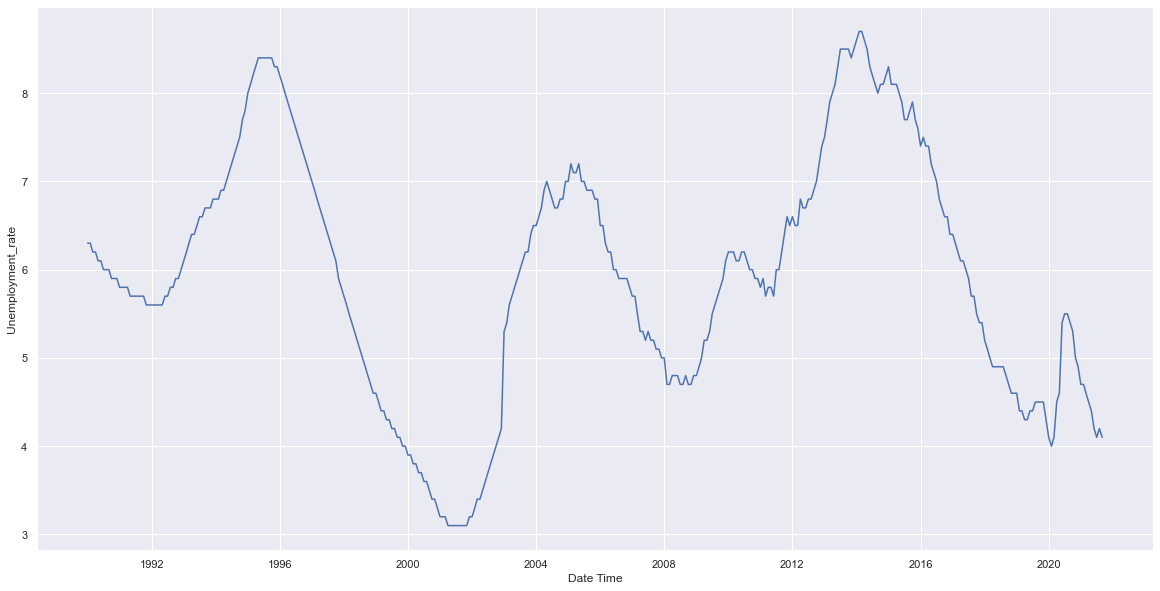

In [60]:
plt.figure(figsize =(20, 10))
sb.lineplot(x = Unemployment_rate.index, y = Unemployment_rate['Unemployment_rate'])
plt.show() ## Plot Unemployment_rate history

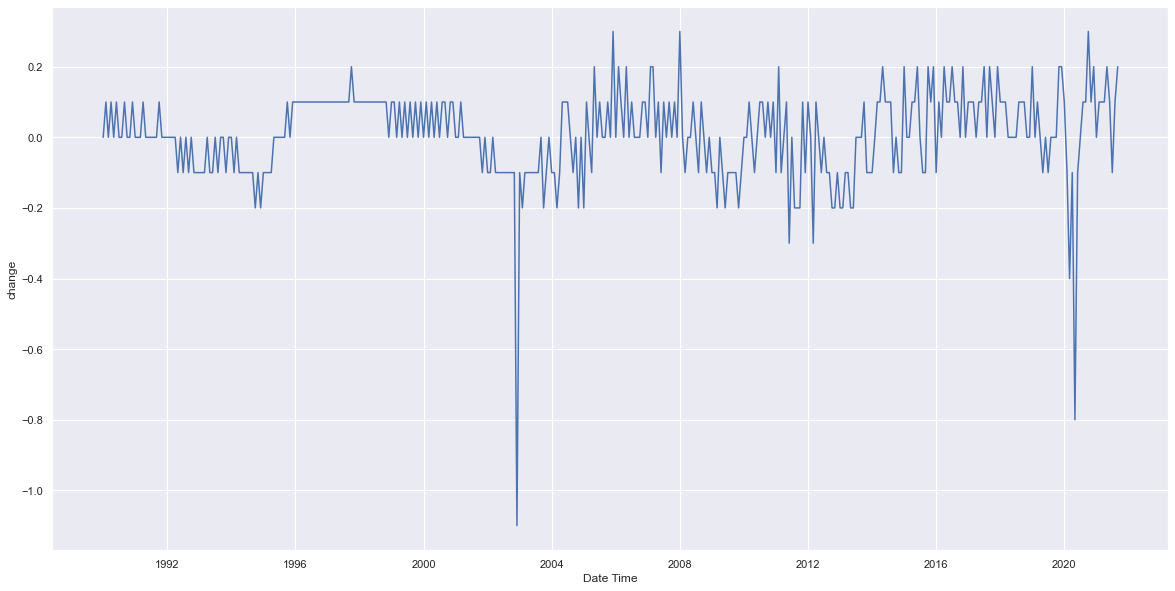

In [61]:
plt.figure(figsize =(20, 10))
sb.lineplot(x = Unemployment_rate.index, y = Unemployment_rate['change'])
plt.show() ## Plot the monthly changes of Unemployment _rate over time

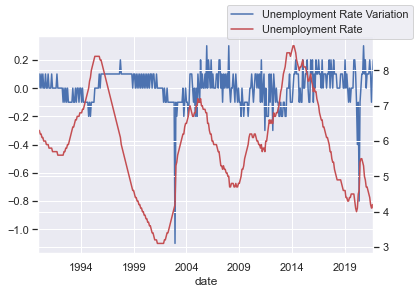

In [63]:
Both = pd.DataFrame({"date": Unemployment_rate['Date Time'],
                   "Unemployment Rate Variation": Unemployment_rate['change'], 
                   "Unemployment Rate": Unemployment_rate['Unemployment_rate']})

ax = Both.plot(x="date", y="Unemployment Rate Variation", legend=False)
ax2 = ax.twinx()
Both.plot(x="date", y="Unemployment Rate", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show() ## Plot both the Unemployment rate and rate variation for each month

## Linear Regression Model

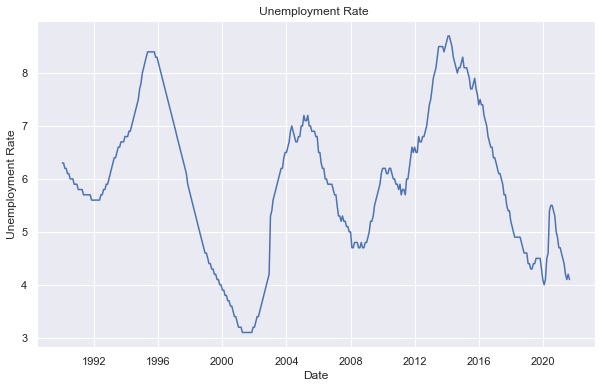

In [84]:
#plot Unemployment Rate
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.plot(Unemployment_rate['Unemployment_rate'])
plt.title('Unemployment Rate ')
plt.show()

<AxesSubplot:ylabel='Density'>

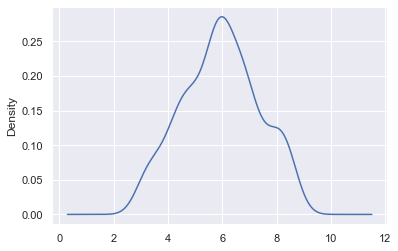

In [85]:
df_rate = Unemployment_rate['Unemployment_rate']
df_rate.plot(kind='kde')

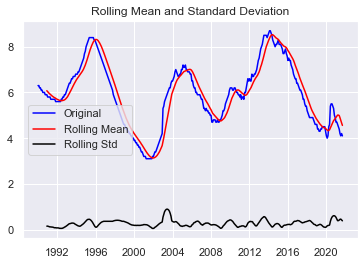

Results of dickey fuller test
Test Statistics                 -2.999476
p-value                          0.034943
No. of lags used                10.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [86]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_rate)

<Figure size 432x288 with 0 Axes>

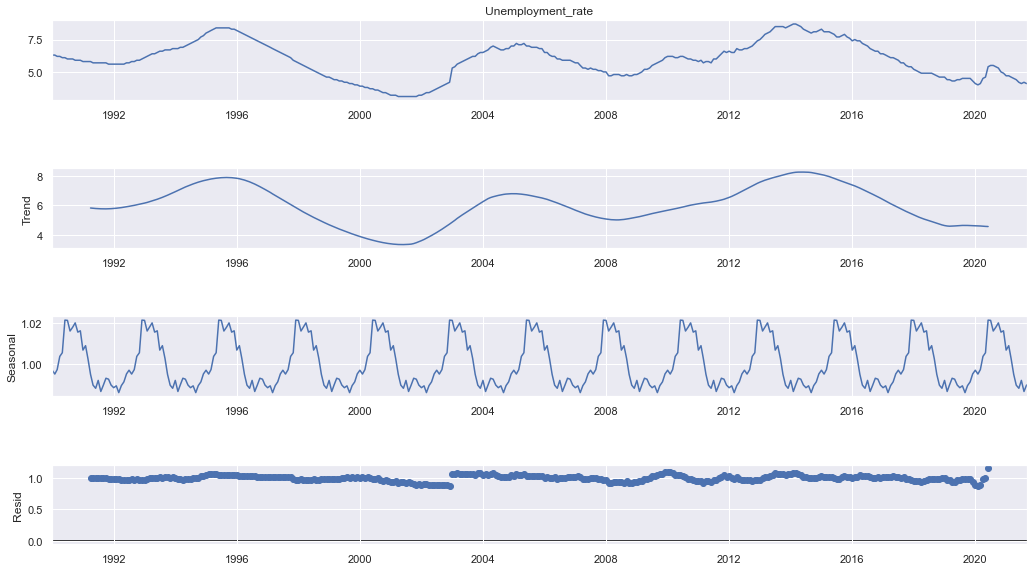

In [87]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_rate, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


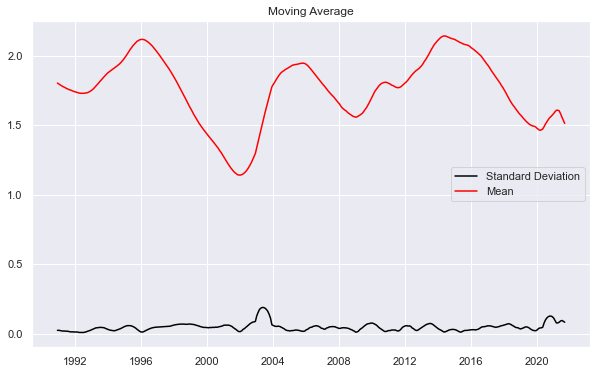

In [89]:
#if not stationary then eliminate trend
#Eliminate trend
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_rate)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

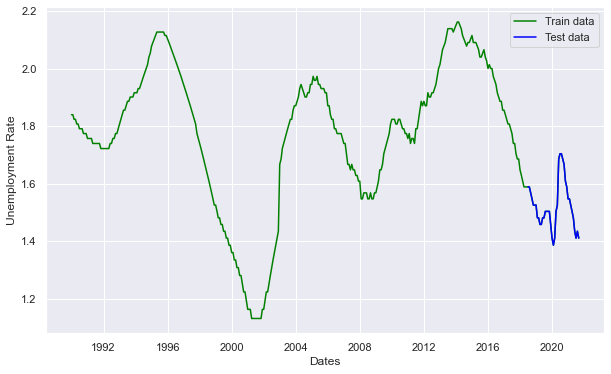

In [90]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Unemployment Rate')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1516.865, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1660.205, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-1718.873, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1518.864, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-1725.054, Time=0.27 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-1723.359, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1723.131, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-1724.038, Time=0.52 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-1694.556, Time=0.10 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1721.156, Time=0.36 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1727.053, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1720.867, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1662.203, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1725.562, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0

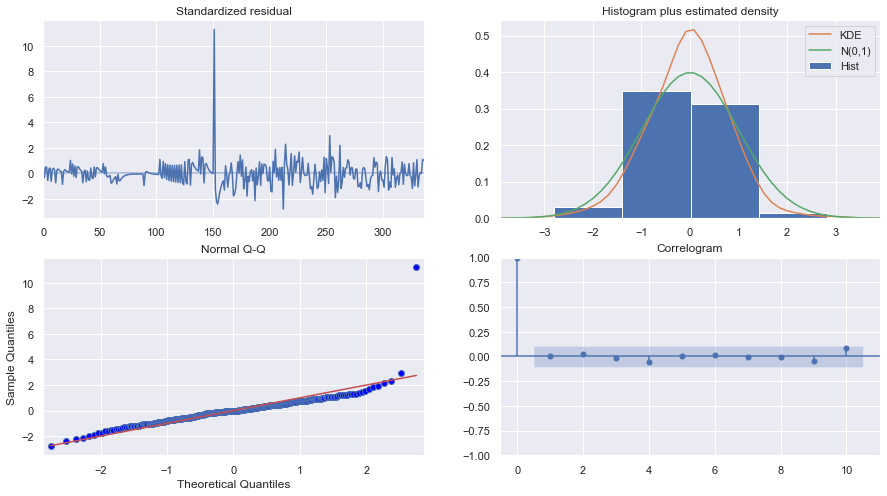

In [91]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [94]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Unemployment_rate   No. Observations:                  338
Model:                  ARIMA(0, 1, 2)   Log Likelihood                 845.135
Method:                        css-mle   S.D. of innovations              0.020
Date:                 Thu, 31 Mar 2022   AIC                          -1682.270
Time:                         13:06:13   BIC                          -1666.978
Sample:                     05-01-1990   HQIC                         -1676.175
                          - 06-01-2018                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0007      0.002     -0.450      0.653      -0.004       0.002
ma.L1.D.Unemployment_rate     0.1313      0.056      2.337      0.019       0.

In [109]:
# Forecast
fc, se, conf = fitted.forecast(39, alpha=0.05)  # 95% conf

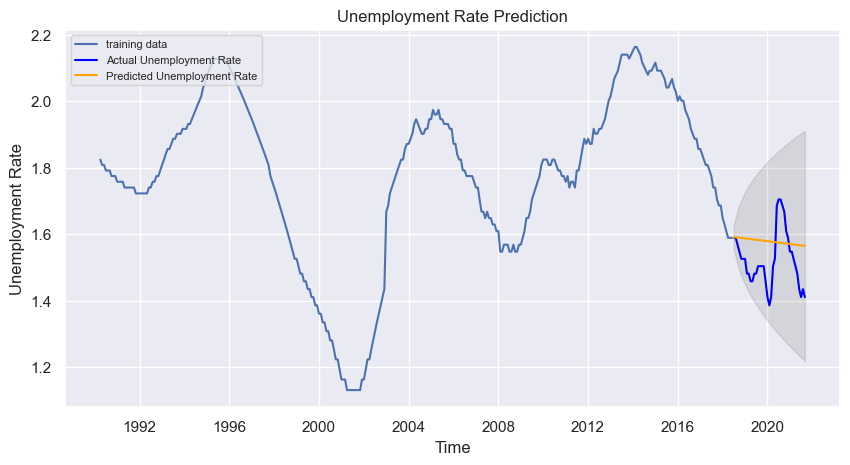

In [110]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Unemployment Rate')
plt.plot(fc_series, color = 'orange',label='Predicted Unemployment Rate')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Unemployment Rate Prediction')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [111]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.010129970459261572
MAE: 0.08843443957383987
RMSE: 0.10064775436770347
MAPE: 0.059064243111042115


<p> With a MAPE of around 5.9%, the model is 94.1% accurate in predicting the next observations. </p>

In [112]:
#Modeling
# Build Model with SARIMAX
model=sm.tsa.statespace.SARIMAX(train_data,order=(0, 1, 1),seasonal_order=(1,1,1,12))
fitted_SAR = model.fit()

In [113]:
print(fitted_SAR.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Unemployment_rate   No. Observations:                  339
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 776.388
Date:                            Thu, 31 Mar 2022   AIC                          -1544.777
Time:                                    13:16:12   BIC                          -1529.629
Sample:                                04-01-1990   HQIC                         -1538.732
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1628      0.059      2.743      0.006       0.046       0.279
ar.S.L12       0.1583      0.046   

<p> The predicted Unemployment Rate seems to be bearish for predicted values in Netherlands. Netherlands Unemployment Rate follows a downtrending, since  </p>